In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
df = pd.read_csv('Boston.csv')

In [67]:
df.head()

,raion,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [11]:
boston_shape = df.shape
print(boston_shape)

(506, 15)


In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [14]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


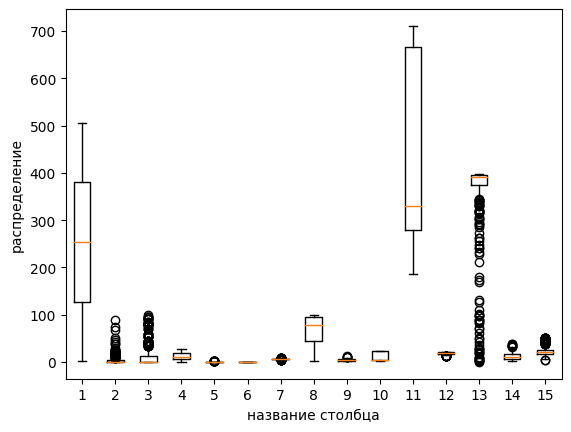

In [28]:
plt.boxplot(df)
plt.xlabel('столбцы')
plt.ylabel('распределение')
plt.show()

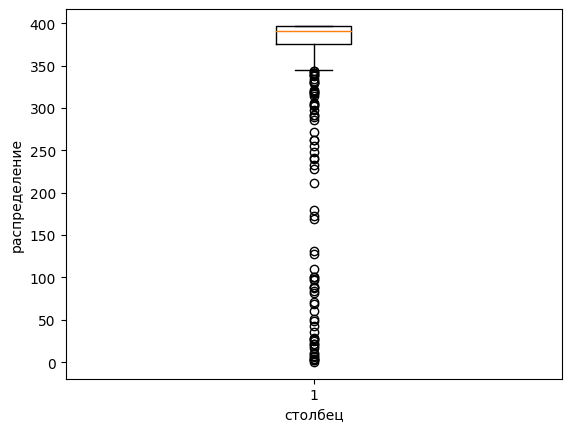

In [29]:
plt.boxplot(df['black'])
plt.xlabel('столбец')
plt.ylabel('распределение')
plt.show()

In [32]:
np.corrcoef(df['crim'], df['lstat'])

array([[1.        , 0.45562148],
       [0.45562148, 1.        ]])

In [34]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


Text(0.5, 1.0, 'Теплавая карта корреляции')

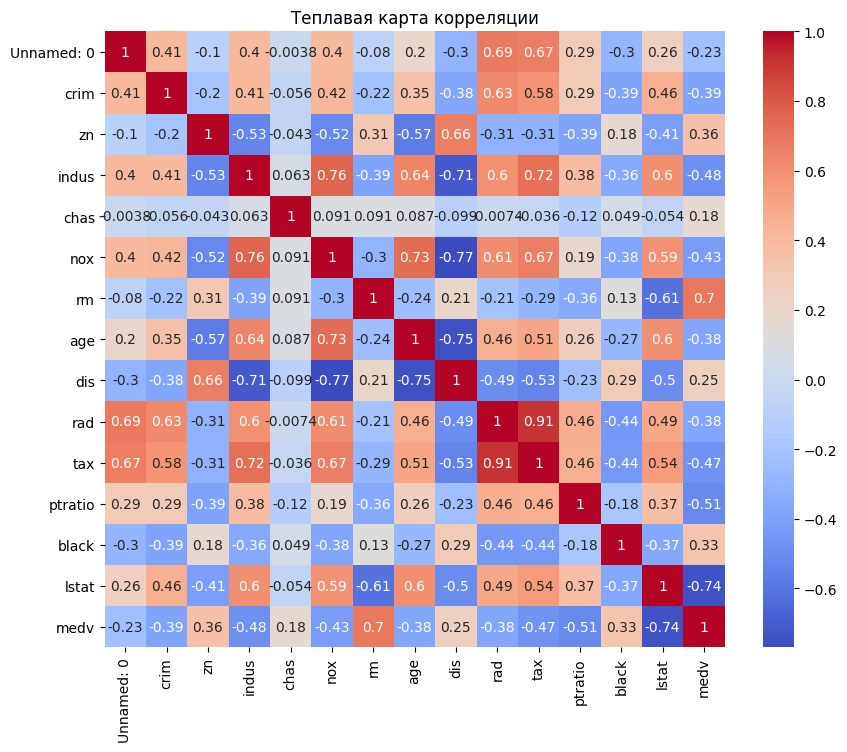

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплавая карта корреляции')

In [41]:
X = df.drop('crim',axis=1)  
y = df['crim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка -",mse)

Среднеквадратичная ошибка - 24.376885594813402


In [62]:
df['crim'].mean()

3.613523557312254

In [63]:
df['medv'].median()

21.2

In [78]:
m = df['crim'].max()
i = df['crim'].idxmax()
print(m, i+1)

88.9762 381


<function matplotlib.pyplot.show(close=None, block=None)>

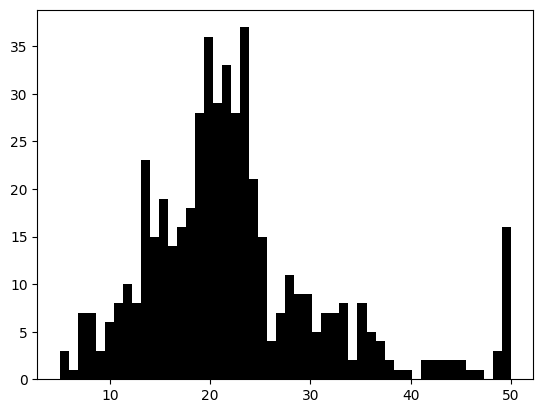

In [82]:
plt.hist(df['medv'], bins=50, color='k')
plt.show

In [85]:
missing_values = df.isnull().sum()
print(missing_values)

raion      0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [87]:
np.corrcoef(df['age'], df['medv'])

array([[ 1.        , -0.37695457],
       [-0.37695457,  1.        ]])

In [158]:
correlation_matrix = df.corr()
top_correlations = correlation_matrix['medv'].sort_values(ascending=False)
top_3_correlations = top_correlations[1:4]
print(top_3_correlations)

rm       0.695360
zn       0.360445
black    0.333461
Name: medv, dtype: float64


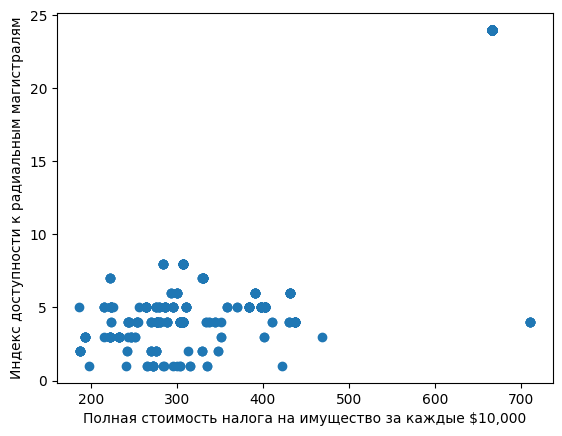

In [96]:
plt.scatter(df['tax'], df['rad'])
plt.xlabel('Полная стоимость налога на имущество за каждые $10,000')
plt.ylabel('Индекс доступности к радиальным магистралям')

plt.show()

In [127]:
correlation_matrix = df.corr()
top_correlations = correlation_matrix['medv'].sort_values(ascending=True)
top_3_correlations = top_correlations[1:4]
print(top_3_correlations)

ptratio   -0.507787
indus     -0.483725
tax       -0.468536
Name: medv, dtype: float64


In [159]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка -",mse)

Среднеквадратичная ошибка - 24.37688559481323


tax      0.910228
raion    0.686002
crim     0.625505
Name: rad, dtype: float64


In [161]:
correlations = df.corrwith(df['tax']) 
sorted_correlations = correlations.abs().sort_values(ascending=False)
top_3_correlations = sorted_correlations[1:4]

X_top3 = X[top_3_correlations.index]
print(X_top3)

X_train, X_test, y_train, y_test = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка -",mse)

     rad  indus    nox
0      1   2.31  0.538
1      2   7.07  0.469
2      2   7.07  0.469
3      3   2.18  0.458
4      3   2.18  0.458
..   ...    ...    ...
501    1  11.93  0.573
502    1  11.93  0.573
503    1  11.93  0.573
504    1  11.93  0.573
505    1  11.93  0.573

[506 rows x 3 columns]
Среднеквадратичная ошибка - 29.889039413967947


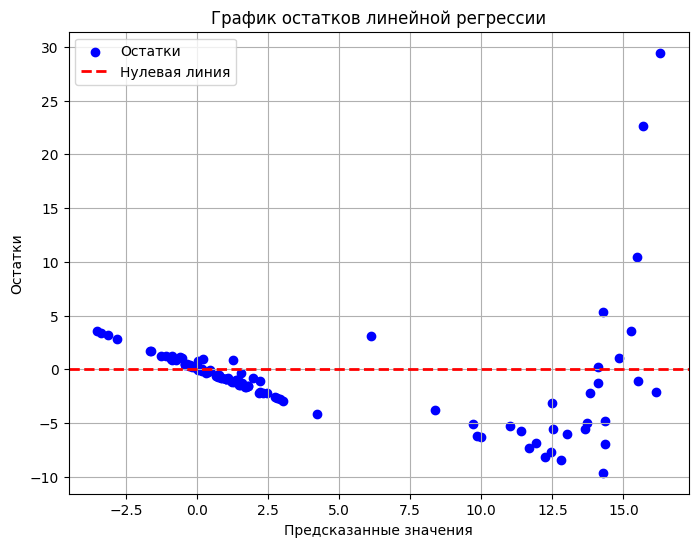

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c='blue', marker='o', label='Остатки')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нулевая линия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

In [163]:
X_drop = df.drop(columns=['zn'])
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка -",mse)

Среднеквадратичная ошибка - 2.0835800919546834e-27


In [148]:
np.corrcoef(df['medv'], df['chas'])

array([[1.        , 0.17526018],
       [0.17526018, 1.        ]])